In [1]:
import pandas as pd

file = './data/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding = 'cp949')
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [2]:
raw['상대'].unique()

array(['한화', '키움', '@삼성', 'KT', 'NC', '@롯데', '@LG', 'SK', '@KIA', '@키움',
       '롯데', '@한화', 'LG', 'KIA', '@NC', '삼성', '@SK', '@KT', '두산', '@두산'],
      dtype=object)

In [5]:
opp_list = []
home_away_list = []

for opp in raw['상대'] :
    
    if "@" in opp:
        home_away = '원정'
        opp = opp.replace('@', '')
        
    else:
        home_away = '홈'
        
    opp_list.append(opp)
    home_away_list.append(home_away)
    
raw['홈어웨이'] = home_away_list
raw['상대팀'] = opp_list

raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,타율,출루,장타,OPS,투구,avLI,RE24,WPA,홈어웨이,상대팀
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,홈,한화
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,홈,한화
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,홈,키움
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,홈,키움
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,홈,키움


In [8]:
data = raw.pivot_table(index = ['팀', '이름', '생일', '상대팀'],
               values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'],
               aggfunc = 'sum')
data.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 고영창 1989-02-24 LG    0   0   0   0   0   0   0   0
    김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1

In [10]:
cond = data['타수'] > 0
data = data[ cond ]

data.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1
                   두산   20   3   0  15  54   5   0   0

In [12]:
data = data.reset_index()
data.head()

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0


In [13]:
def cal_hit(df):
    
    df["타율"] = df["안타"] / df["타수"]
    df["출루율"] = (df["안타"] + df["볼넷"] + df["사구"]) / (df["타수"] + df["볼넷"] + df["사구"] + df["희비"])
    df["장타율"] = df["루타"] / df["타수"]
    df["OPS"] = df["출루율"] + df["장타율"]
    
    return df

In [15]:
player_stats_opp = cal_hit(data)
player_stats_opp.head()

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0,0.121212,0.147059,0.151515,0.298574
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0,0.255319,0.326923,0.319149,0.646072
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0,0.333333,0.440000,0.333333,0.773333
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1,0.277778,0.372093,0.277778,0.649871
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0,0.277778,0.315789,0.370370,0.686160


In [19]:
team = '두산'
cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 10)

player_stats_opp[cond].sort_values(by = '출루율', ascending = False).head(10)

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
538,NC,나성범,1989-10-03,두산,9,1,1,5,12,2,1,0,0.416667,0.500000,0.750000,1.250000
22,KIA,나지완,1985-05-19,두산,11,7,0,5,17,4,1,1,0.294118,0.480000,0.647059,1.127059
564,NC,박민우,1993-02-06,두산,25,5,1,20,49,7,0,0,0.408163,0.472727,0.510204,0.982931
190,KT,강백호,1999-07-29,두산,18,10,0,14,42,8,1,0,0.333333,0.461538,0.428571,0.890110
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.446154,0.555556,1.001709
1591,한화,이성열,1984-07-13,두산,30,8,1,20,54,15,1,2,0.370370,0.446154,0.555556,1.001709
721,SK,로맥,1985-09-30,두산,30,8,2,18,54,10,3,0,0.333333,0.437500,0.555556,0.993056
573,NC,박석민,1985-06-22,두산,20,7,0,12,37,13,2,0,0.324324,0.431818,0.540541,0.972359
239,KT,박경수,1984-03-31,두산,14,6,1,12,37,9,0,0,0.324324,0.431818,0.378378,0.810197
1423,키움,샌즈,1987-09-28,두산,39,13,1,23,73,18,2,0,0.315068,0.425287,0.534247,0.959534


In [20]:
team = '롯데'
cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 20)

player_stats_opp[cond].sort_values(by = '출루율' , ascending = False).head(10)

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1433,키움,서건창,1989-08-22,롯데,26,3,0,21,39,7,0,0,0.538462,0.571429,0.666667,1.238095
610,NC,양의지,1987-06-05,롯데,29,7,2,20,42,8,2,0,0.476190,0.568627,0.690476,1.259104
330,KT,황재균,1987-07-28,롯데,35,11,0,22,47,12,3,1,0.468085,0.559322,0.744681,1.304003
1461,키움,이지영,1986-02-27,롯데,16,2,0,15,31,6,0,0,0.483871,0.515152,0.516129,1.031281
1195,삼성,김상수,1990-03-23,롯데,23,13,2,17,49,5,1,0,0.346939,0.500000,0.469388,0.969388
410,LG,이천웅,1988-10-20,롯데,33,10,0,24,61,5,1,0,0.393443,0.478873,0.540984,1.019857
222,KT,로하스,1990-05-24,롯데,38,6,0,23,54,12,3,1,0.425926,0.475410,0.703704,1.179114
287,KT,유한준,1981-07-01,롯데,30,11,0,21,56,10,2,1,0.375000,0.470588,0.535714,1.006303
574,NC,박석민,1985-06-22,롯데,39,12,1,18,54,19,5,1,0.333333,0.455882,0.722222,1.178105
5,KIA,김선빈,1989-12-18,롯데,10,6,0,9,25,3,0,2,0.360000,0.454545,0.400000,0.854545


In [25]:
hitter_df = pd.DataFrame()

for team in player_stats_opp['상대팀'].unique():
    
    cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 20)
    df = player_stats_opp[cond].sort_values(by = '출루율' , ascending = False).head()
    
    hitter_df = hitter_df.append(df)
    
hitter_df

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1204,삼성,김헌곤,1988-11-09,KT,13,11,1,12,38,3,0,0,0.315789,0.480000,0.342105,0.822105
415,LG,이형종,1989-06-07,KT,19,6,1,15,39,3,1,0,0.384615,0.478261,0.487179,0.965440
463,LG,페게로,1987-02-22,KT,19,3,0,11,27,11,2,0,0.407407,0.466667,0.703704,1.170370
816,SK,한동민,1989-08-09,KT,25,8,1,19,51,10,2,0,0.372549,0.466667,0.490196,0.956863
1401,키움,박병호,1986-07-10,KT,26,14,1,10,38,10,5,2,0.263158,0.454545,0.684211,1.138756
1609,한화,정근우,1982-10-02,LG,13,8,0,11,27,7,0,0,0.407407,0.542857,0.481481,1.024339
1375,키움,김하성,1995-10-17,LG,39,18,1,27,69,13,1,1,0.391304,0.516854,0.565217,1.082071
142,KIA,터커,1990-07-06,LG,19,7,0,15,36,9,1,1,0.416667,0.500000,0.527778,1.027778
883,두산,박건우,1990-09-08,LG,24,9,1,17,45,6,1,1,0.377778,0.482143,0.533333,1.015476
856,두산,김재호,1985-03-21,LG,23,9,0,16,44,9,1,0,0.363636,0.471698,0.522727,0.994425


In [26]:
hitter_df['이름'].unique()

array(['김헌곤', '이형종', '페게로', '한동민', '박병호', '정근우', '김하성', '터커', '박건우',
       '김재호', '민병헌', '박승욱', '강백호', '오재일', '김민하', '이원재', '장영석', '허경민',
       '양의지', '박민우', '호잉', '이성열', '로맥', '서건창', '황재균', '이지영', '김상수', '김혜성',
       '최형우', '이정후', '안치홍', '박석민', '이원석', '윌슨', '최주환', '오지환'],
      dtype=object)

In [29]:
cond = []
for name in player_stats_opp['이름']:
    
    if name in hitter_df['이름'].unique():
        cond.append(True)
    else:
        cond.append(False)
        
player_stats_opp[cond]

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
70,KIA,안치홍,1990-07-02,KT,15,1,0,14,49,6,0,0,0.285714,0.300000,0.306122,0.606122
71,KIA,안치홍,1990-07-02,LG,7,5,1,6,22,4,0,0,0.272727,0.428571,0.318182,0.746753
72,KIA,안치홍,1990-07-02,NC,20,3,0,12,39,7,2,0,0.307692,0.357143,0.512821,0.869963
73,KIA,안치홍,1990-07-02,SK,17,3,0,13,47,4,1,1,0.276596,0.313725,0.361702,0.675428
74,KIA,안치홍,1990-07-02,두산,15,2,0,12,40,2,0,0,0.300000,0.333333,0.375000,0.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,한화,호잉,1989-05-18,SK,20,2,1,15,55,7,1,0,0.272727,0.310345,0.363636,0.673981
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.446154,0.555556,1.001709
1665,한화,호잉,1989-05-18,롯데,18,2,1,11,43,6,1,0,0.255814,0.304348,0.418605,0.722952
1666,한화,호잉,1989-05-18,삼성,20,3,1,12,51,8,2,1,0.235294,0.285714,0.392157,0.677871


In [36]:
cond = player_stats_opp['이름'].isin( hitter_df['이름'].unique() )
top_df = player_stats_opp[ cond ]

top_pivot = top_df.pivot_table(index = ['팀', '이름'], values = '출루율', columns = '상대팀')
top_pivot

상대팀           KIA        KT        LG        NC        SK        두산        롯데  \
팀   이름                                                                          
KIA 안치홍       NaN  0.300000  0.428571  0.357143  0.313725  0.333333  0.421053   
    최형우       NaN  0.450000  0.400000  0.370968  0.385714  0.379310  0.431034   
    터커        NaN  0.378378  0.500000  0.260870  0.511628  0.421053  0.294118   
KT  강백호  0.406780       NaN  0.327869  0.490909  0.393443  0.461538  0.394366   
    박승욱  0.190476       NaN  0.210526  0.560000  0.368421  0.234043  0.296296   
    황재균  0.313433       NaN  0.384615  0.333333  0.228070  0.326087  0.559322   
LG  오지환  0.483871  0.390625       NaN  0.360656  0.233333  0.418182  0.209677   
    이형종  0.425926  0.478261       NaN  0.280000  0.274194  0.294118  0.359375   
    페게로  0.269231  0.466667       NaN  0.206897  0.321429  0.400000  0.200000   
NC  박민우  0.465517  0.351852  0.369863       NaN  0.328125  0.472727  0.387097   
    박석민  0.295455  0.416667  0.370370       NaN  0.380952  0.431818  0.455882   
    양의지  0.563636  0.333333  0.383333       NaN  0.448276  0.400000  0.568627   
    이원재  0.354839  0.333333  0.230769       NaN  0.483871  0.200000  0.192308   
SK  로맥   0.353846  0.338462  0.363636  0.387097       NaN  0.437500  0.413793   
    한동민  0.301887  0.466667  0.392857  0.433333       NaN  0.359375  0.377358   
두산  김재호  0.410256  0.409091  0.471698  0.297872  0.285714       NaN  0.345455   
    박건우  0.274510  0.446429  0.482143  0.450000  0.436364       NaN  0.366667   
    오재일  0.363636  0.327869  0.241379  0.468750  0.290909       NaN  0.442308   
    최주환  0.511628  0.205882  0.350000  0.297297  0.333333       NaN  0.295455   
    허경민  0.372881  0.316667  0.307692  0.363636  0.450980       NaN  0.363636   
롯데  민병헌  0.567568  0.404762  0.351852  0.564103  0.333333  0.307692       NaN   
    윌슨   0.235294  0.269231  0.444444  0.347826  0.400000  0.195122       NaN   
삼성  김상수  0.454545  0.269231  0.294118  0.323077  0.355932  0.344828  0.500000   
    김헌곤  0.250000  0.480000  0.347826  0.267857  0.333333  0.338983  0.400000   
    이원석  0.396226  0.270833  0.232143  0.339286  0.339623  0.263158  0.227273   
키움  김하성  0.355263  0.293103  0.516854  0.397059  0.397727  0.351648  0.436620   
    김혜성  0.325000  0.319149  0.306452  0.212121  0.301887  0.260000  0.285714   
    박병호  0.493151  0.454545  0.404494  0.261905  0.385714  0.315789  0.380952   
    서건창  0.382979  0.293103  0.358209  0.389831  0.294118  0.367089  0.571429   
    이정후  0.432432  0.385714  0.362500  0.342857  0.400000  0.351648  0.346154   
    이지영  0.243902  0.250000  0.311111  0.324324  0.380000  0.348837  0.515152   
    장영석  0.321429  0.311111  0.268293  0.244898  0.465116  0.189189  0.234043   
한화  김민하  0.266667  0.454545  0.312500  0.468750  0.222222  0.222222  0.218750   
    이성열  0.345455  0.278689  0.326087  0.384615  0.302326  0.446154  0.300000   
    정근우  0.206897  0.302326  0.542857  0.304348  0.263158  0.419355  0.310345   
    호잉   0.355932  0.347826  0.254545  0.309091  0.310345  0.446154  0.304348   

상대팀            삼성        키움        한화  
팀   이름                                 
KIA 안치홍  0.438596  0.500000  0.362069  
    최형우  0.500000  0.409836  0.388060  
    터커   0.309524  0.425000  0.362069  
KT  강백호  0.400000  0.400000  0.512195  
    박승욱  0.222222  0.230769  0.285714  
    황재균  0.388060  0.277778  0.395833  
LG  오지환  0.379310  0.253521  0.333333  
    이형종  0.454545  0.393443  0.307692  
    페게로  0.360000  0.410256  0.235294  
NC  박민우  0.360656  0.400000  0.509804  
    박석민  0.257576  0.478261  0.454545  
    양의지  0.320000  0.404762  0.500000  
    이원재  0.346154  0.238095  0.340909  
SK  로맥   0.391304  0.265823  0.388889  
    한동민  0.275000  0.361111  0.392157  
두산  김재호  0.428571  0.438356  0.350877  
    박건우  0.412698  0.308642  0.366197  
    오재일  0.343750  0.333333  0.476923  
    최주환  0.400000  0.306122  0.250000  
    허경민  0.327273  0.300000  0.405797  
롯데  민병헌  0.368421  0.200000  0.381818  
 

In [37]:
# 이미지 상에 들어있는 한글을 표시하기 위한 한글 폰트를 지정, 필요한 라이브러리를 불러들이는 코드
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows': #윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else: # 맥인 경우 애플고딕
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 코드
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='상대팀', ylabel='팀-이름'>

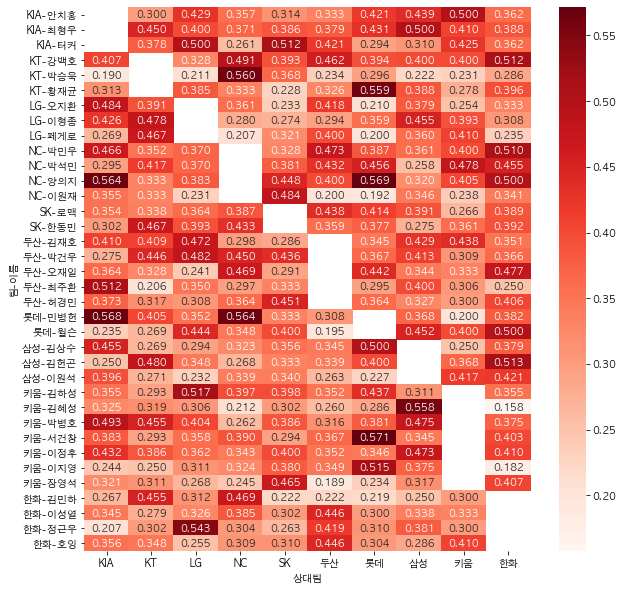

In [44]:
fig, ax = plt.subplots( figsize = (10,10))
sns.heatmap(top_pivot,
           annot = True, fmt = '.3f',
           cmap = 'Reds')

<AxesSubplot:xlabel='상대팀', ylabel='팀-이름'>

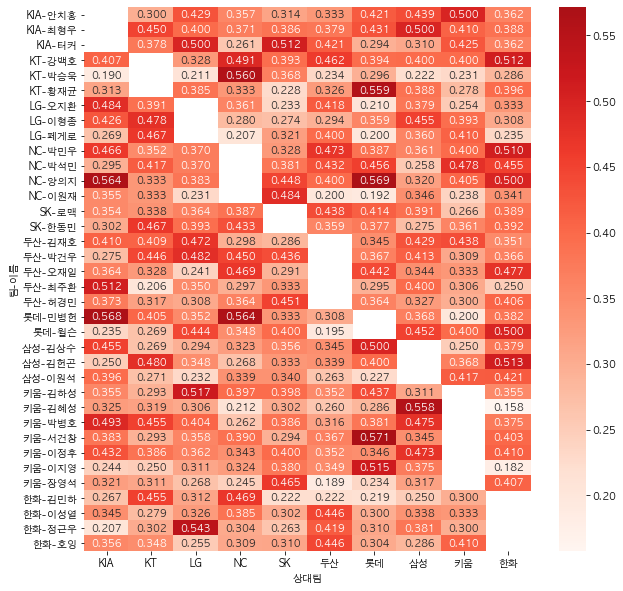

In [47]:
fig, ax = plt.subplots( figsize = (10,10))
sns.heatmap(top_pivot,
           annot = True, fmt = '.3f',
           cmap = 'Reds',
           center = 0.4)